In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot 
import statistics

train = pd.read_csv('total_rent.csv')
train.head(5)


,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,SNOWFALL,RENTCOUNT
0,0.0,2013,1,1,0,1,3,-8.8,0.0,0.1,90.0,8.8,0.0
1,0.0,2013,1,1,1,1,3,-8.5,0.0,0.9,90.0,8.8,0.0
2,0.0,2013,1,1,2,1,3,-8.5,0.0,1.0,89.0,8.8,0.0
3,0.0,2013,1,1,3,1,3,-9.0,0.0,0.7,91.0,8.8,0.0
4,0.0,2013,1,1,4,1,3,-9.1,0.0,0.6,92.0,8.8,0.0


In [433]:
train.describe()

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,SNOWFALL,RENTCOUNT
count,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06,3.426719e+06
mean,5.363451e+01,2.013961e+03,6.833142e+00,1.583686e+01,1.548210e+01,3.101681e+00,1.218347e+00,1.038595e-01,8.931576e-04,1.190874e-02,5.505733e-01,1.673437e-03,9.923133e-01
std,4.239645e+01,1.247842e+01,2.826990e+00,8.824357e+00,5.983423e+00,2.001080e+00,9.686768e-01,1.502759e+00,7.534558e-02,1.663442e-01,6.505240e+00,1.296714e-01,8.733596e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.650000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800000e+01,2.013000e+03,5.000000e+00,8.000000e+00,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,4.500000e+01,2.014000e+03,7.000000e+00,1.600000e+01,1.700000e+01,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,8.300000e+01,2.015000e+03,9.000000e+00,2.300000e+01,2.000000e+01,5.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.260000e+02,2.017000e+03,1.200000e+01,3.100000e+01,2.300000e+01,6.000000e+00,3.000000e+00,3.590000e+01,3.600000e+01,9.100000e+00,1.000000e+02,1.840000e+01,1.000000e+00


In [434]:
station_df = pd.read_csv('station.csv')
station_df.head(5)

,번호,키오스크번호,구별,명칭,위치,주소,거치대,좌표
0,1,1,유성구,무역전시관입구(택시승강장 앞),엑스포다리 맞은편,유성구 도룡동 3-8,14,"36.374325,127.387462"
1,2,2,유성구,대전컨벤션 센터 앞,둔산대교 맞은편,유성구 도룡동 4-19,20,"36.374472,127.392241"
2,3,3,서구,한밭수목원(정문입구),한밭수목원 내,서구 만년동 396,19,"36.369855,127.388749"
3,4,4,서구,초원아파트104동부근(버스정류장),초원아파트 104동앞 쪽문 육교 버스정류장 앞,서구 만년동 401,12,"36.368192,127.379281"
4,5,5,서구,둔산대공원 입구(버스정류장),한밭수목원에서 평송수련원 가는길 버스정류장 앞,서구 둔산동 1521-10,13,"36.365034,127.389361"


In [435]:
train.groupby(['STATION'])['RENTCOUNT'].sum().nlargest(10)

STATION
3.0      174722.0
56.0      91232.0
31.0      83506.0
17.0      83081.0
32.0      73597.0
33.0      71317.0
14.0      57544.0
105.0     56739.0
21.0      55542.0
55.0      54999.0
Name: RENTCOUNT, dtype: float64

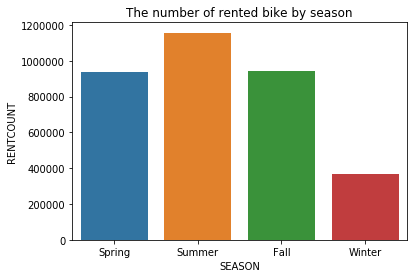

In [436]:
group_season = train.groupby(['SEASON'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['SEASON'], y=group_season['RENTCOUNT'])
season = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xticks(np.arange(4), season)
plt.title('The number of rented bike by season')
plt.show()

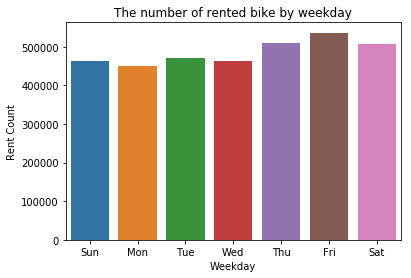

In [437]:
group_weekday = train.groupby(['WEEKDAY'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_weekday['WEEKDAY'], y=group_weekday['RENTCOUNT'])
ax.set(xlabel='Weekday', ylabel='Rent Count')
weekday = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(np.arange(7), weekday)
plt.title('The number of rented bike by weekday')
plt.show()

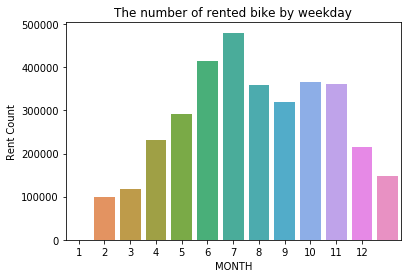

In [468]:
group_month = train.groupby(['MONTH'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_month['MONTH'], y=group_month['RENTCOUNT'])
ax.set(xlabel='MONTH', ylabel='Rent Count')
month = []
for i in range(12):
    month.append(str(i+1))
plt.xticks(np.arange(12), month)
plt.title('The number of rented bike by weekday')
plt.show()

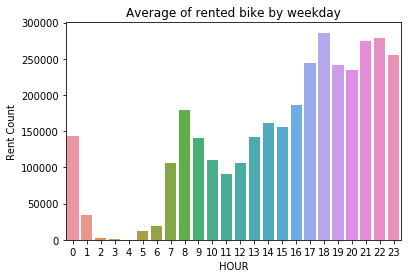

In [439]:
group_hour = train.groupby(['HOUR'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_hour['HOUR'], y=group_hour['RENTCOUNT'])
ax.set(xlabel='HOUR', ylabel='Rent Count')
hour = []
for i in range(24):
    hour.append(str(i))
plt.xticks(np.arange(24), hour)
plt.title('Average of rented bike by weekday')
plt.show()

In [440]:
import gmplot
import statistics

coordinate = (station_df['좌표'])


station = train.groupby(['STATION'])['RENTCOUNT'].sum().nlargest(10)

#print(station.index)
top10_lat = []
top10_lon = []

tmp=station_df[station_df['번호'].isin(['3'])]
#print(tmp['좌표'].iloc[0].split(',')[0])

for i in range(10):
    location = station_df[station_df['번호'].isin([station.index[i]])]
    top10_lat.append(float(location['좌표'].iloc[0].split(',')[0]))
    top10_lon.append(float(location['좌표'].iloc[0].split(',')[1]))
    

gmapl = gmplot.GoogleMapPlotter(statistics.median(top10_lat), statistics.median(top10_lon), 14)
gmapl.scatter(top10_lat, top10_lon, '#ff0000', size=30)
gmapl.draw('top10.html')


In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [1050]:
train_data = pd.read_csv('total_rent.csv')
train_data['MONTH'] = train_data['MONTH'].astype('object')
train_data['HOUR'] = train_data['HOUR'].astype('object')
train_data['WEEKDAY'] = train_data['WEEKDAY'].astype('object')
train_data['SEASON'] = train_data['SEASON'].astype('object')
train_data.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,RENTCOUNT,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,SNOWFALL
0,34.0,2013,1,1,6,1.0,1,3,-9.0,0.0,1.4,93.0,8.8
1,10.0,2013,1,1,6,1.0,1,3,-9.0,0.0,1.4,93.0,8.8
2,0.0,2013,1,1,10,1.0,1,3,-5.3,0.0,0.4,98.0,15.3
3,105.0,2013,1,1,10,1.0,1,3,-5.3,0.0,0.4,98.0,15.3
4,4.0,2013,1,1,12,1.0,1,3,-0.5,1.9,0.7,88.0,15.0


In [1116]:
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('total_rent.csv')
weather_data = pd.read_csv('all_weather.csv')
del weather_data['TIME']
weather_data = weather_data.fillna(0)
asdf = pd.merge(weather_data, train_data, how='right')

train_data = asdf
test_data = train_data.loc[train_data['YEAR'].isin([2015]) & train_data['MONTH'].isin([1]) & train_data['DAY'].isin([1])]
#print(test_data)
del test_data['STATION']
del test_data['YEAR']
del test_data['DAY']
tsty = test_data['RENTCOUNT']

print(test_data.groupby(['HOUR']).head(10))
del test_data['RENTCOUNT']
tstx = test_data
del train_data['STATION']
del train_data['YEAR']
del train_data['DAY']
X_train = train_data
y_train = train_data['RENTCOUNT']
del train_data['RENTCOUNT']




         TEMPERATURE  RAINFALL  WINDSPEED  HUMIDITY  SNOWFALL  MONTH  HOUR  \
2393088         -4.1       0.3        4.2      82.0       0.5      1     0   
2393089         -4.1       0.3        4.2      82.0       0.5      1     0   
2393090         -4.1       0.3        4.2      82.0       0.5      1     0   
2393091         -4.1       0.3        4.2      82.0       0.5      1     0   
2393092         -4.1       0.3        4.2      82.0       0.5      1     0   
2393093         -4.1       0.3        4.2      82.0       0.5      1     0   
2393094         -4.1       0.3        4.2      82.0       0.5      1     0   
2393095         -4.1       0.3        4.2      82.0       0.5      1     0   
2393096         -4.1       0.3        4.2      82.0       0.5      1     0   
2393097         -4.1       0.3        4.2      82.0       0.5      1     0   
2393104         -5.7       0.0        2.8      74.0       0.5      1     1   
2393105         -6.4       0.0        2.6      60.0       0.5   

In [1099]:
# Randomforest를 통한 학습 진행
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Error: 0.04 degrees.


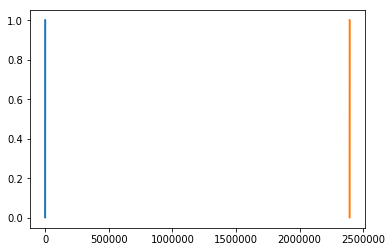

In [1118]:
# RSME 계산
predictions = rf.predict(tstx)
errors = np.sqrt(np.mean((predictions - tsty)**2))
print('Error:', round(errors, 2), 'degrees.')

plt.plot(predictions)
plt.plot(tsty)
plt.show()

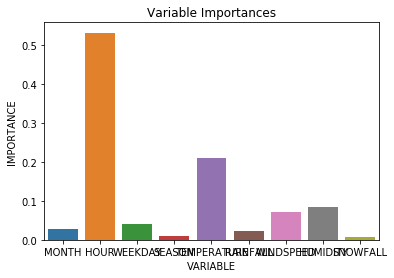

In [1044]:
importances = list(rf.feature_importances_)
variables = ['MONTH','HOUR','WEEKDAY','SEASON','TEMPERATURE','RAINFALL','WINDSPEED','HUMIDITY','SNOWFALL']
ax = sns.barplot(x=variables, y=importances)
ax.set(xlabel='VARIABLE', ylabel='IMPORTANCE')

plt.xticks(np.arange(9), variables)
plt.title('Variable Importances')
plt.show()